## Recovery time plot

In [1]:
import cmath
import math 
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def differential(X, P=(4.5,3.5,1.4)):
    x,y=X
    a,b,c = P
    xdot = 0.5*(a*x +b)*(1+y*y-x*x) - a*x*y*y +c*y - x
    ydot = -0.5*(a*x*x*y + 2*b*x*y + a*y*y*y -a*y) -c*x -y
    return (xdot,ydot)


In [3]:
def iterate(X, lr=0.00001, P=(4.5,3.5,1.4)):
    xdot,ydot=differential(X,P)
    x,y=X
    x_iter,y_iter=x + lr*xdot, y + lr*ydot
    return (x_iter, y_iter)

In [4]:
def jet_lag(dp):
    pi = math.pi
    dp = dp*2*pi/24
    return cmath.exp(complex(0,dp))



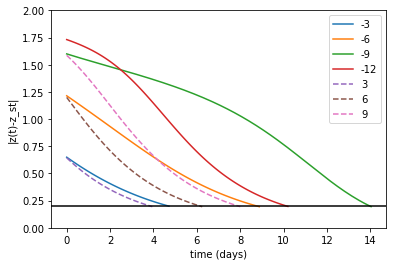

In [5]:
def plot_dp(dp):
    xst,yst = fsolve(differential,(0,1))
    zst = complex(xst,yst)
    zin = zst*jet_lag(dp)
    Xiter = (zin.real, zin.imag)
    abs_data =[]
    increment_rate=0.01
    counter=0
    abs_value = abs(zin-zst)
    while abs_value>0.2:
        Xiter= iterate(Xiter, lr=increment_rate)
        ziter = complex(Xiter[0],Xiter[1])
        abs_value = abs(ziter-zst)
        abs_data.append(abs_value)
        counter+=1
    # print(counter,'\n')
    days = counter*increment_rate/(24*3.8e-3)
    time_data = np.linspace(0,days,counter)
    if dp<0:
        plt.plot(time_data,abs_data)
    else:
        plt.plot(time_data,abs_data,'--')
        
phase_differences=[-3,-6,-9,-12,3,6,9]
phase_differences_legend = [str(x) for x in phase_differences]
for dp in phase_differences:
    plot_dp(dp)
plt.ylim(0,2)
# plt.xlim(0,150)
plt.ylabel('|z(t)-z_st|')
plt.xlabel('time (days)')
# plt.plot([0,200],[0.2,0.2])
plt.legend(phase_differences_legend)
plt.axhline(y=0.2, color='black', linestyle='-')
plt.show()